### Loading abalone data in pandas datframe

In [27]:
from sklearn import datasets
from statsmodels.formula.api import logit, probit, poisson, ols
import statsmodels.api as sm
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import roc_curve
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
plt.style.use('fivethirtyeight')  # Good looking plots

data_directory = os.path.join('.', 'Data')

abalone_data_path = os.path.join(data_directory, 'abalone.csv')
abalone = pd.read_csv(abalone_data_path, low_memory=False, encoding='latin-1')


### The original data did not have headers in it. Adding headers to the dataframe

In [28]:
file = open("abalone.data", "r")
df = pd.read_table(file, sep=',', names=["Sex", "Length", "Diameter", "Height",
                   "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])

df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


###  Sex is either Male ("M"), Female ("F") or Infant ("I"), this is not suitable for regression algorithms, so I created a numeric feature: 1:Male, 2: Female, 3:Infant

In [29]:
sex_dictionary = {'M': 1, 'F': 2, 'I': 3}
df['Sex'] = df['Sex'].apply(lambda x: sex_dictionary[x])


### Finding datatype of all the variables

In [30]:
df.dtypes


Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

### Finding the shape of dataframe

In [31]:
print(df.shape)
print(df.columns)
# print(loan.describe())


(4177, 9)
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


### Getting summary metrics for the dataframe

In [32]:
print(df.describe())


               Sex       Length     Diameter       Height  Whole weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean      1.955470     0.523992     0.407881     0.139516      0.828742   
std       0.827815     0.120093     0.099240     0.041827      0.490389   
min       1.000000     0.075000     0.055000     0.000000      0.002000   
25%       1.000000     0.450000     0.350000     0.115000      0.441500   
50%       2.000000     0.545000     0.425000     0.140000      0.799500   
75%       3.000000     0.615000     0.480000     0.165000      1.153000   
max       3.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked weight  Viscera weight  Shell weight        Rings  
count     4177.000000     4177.000000   4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684  
std          0.221963        0.109614      0.139203     3.224169  
min          0.001000        0.000500      0.001500     

### Checking for missing/null values. 

In [33]:

df.select_dtypes(include=['object']).isnull().sum()
df.select_dtypes(include=[np.number]).isnull().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Adding age column in the dataframe for classification. Age is classified based on the number of rings.
### Rings 1-8 -->Age 1, denoting young
###  Rings 9-10 -->Age 2, denoting middle
### Rings 11-29 -->Age 3, denoting old

In [34]:
def label_race(row):
    if row['Rings'] >= 1 and row['Rings'] <= 8:
        return 1
    elif row['Rings'] >= 9 and row['Rings'] <= 10:
        return 2
    elif row['Rings'] >= 11 and row['Rings'] <= 29:
        return 3
    return 0


In [35]:
df['Age'] = df.apply(lambda _: '', axis=1)


In [36]:
df['Age'] = df.apply(lambda row: label_race(row), axis=1)


In [37]:
df.Sex = df.Sex.astype(float)
df


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [38]:
df[df['Height'] == 0]


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
1257,3.0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1
3996,3.0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1


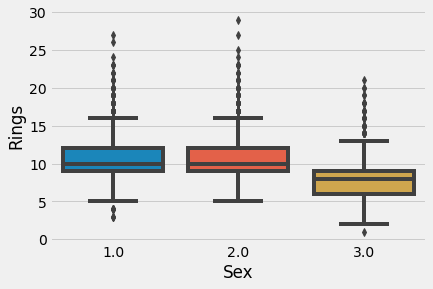

In [39]:
ax = sns.boxplot(x="Sex", y="Rings", data=df)


### Infants have lower number of rings as compared to males and females

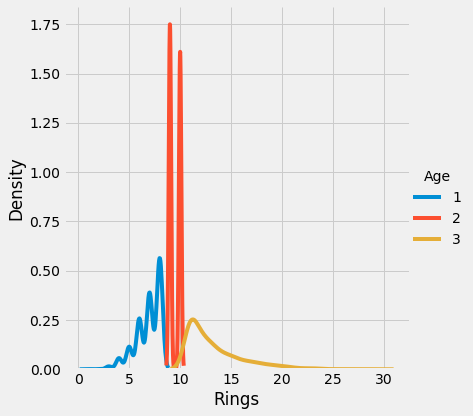

In [40]:
sns.FacetGrid(df, hue="Age", height=6) \
   .map(sns.kdeplot, "Rings") \
   .add_legend()


### Age labelled 1 are youth, label 2 are middle aged and 3 are old aged. Young abalones have 0-10 rings, Middle aged abalones have 9-11 rings and old abalones have more than 10 rings

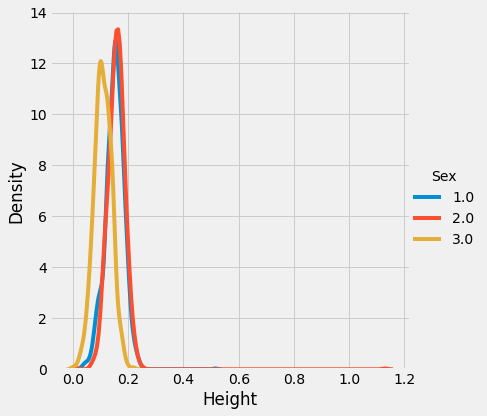

In [41]:
sns.FacetGrid(df, hue="Sex", height=6) \
   .map(sns.kdeplot, "Height") \
   .add_legend()


### Female abalones have more height than males and infants. Height of infants is between 0 to 0.3mm

### Classification

### Response variable is age

In [42]:
Y = df[['Age']]
Y


,Age
0,3
1,1
2,2
3,2
4,1
...,...
4172,3
4173,2
4174,2
4175,2


### Predictor variables obtained by dropping rings and age from the dataframe 

In [43]:

X = df.drop(['Age', 'Rings'], axis=1)
X


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


### Plotting correlation matrix

<AxesSubplot:>

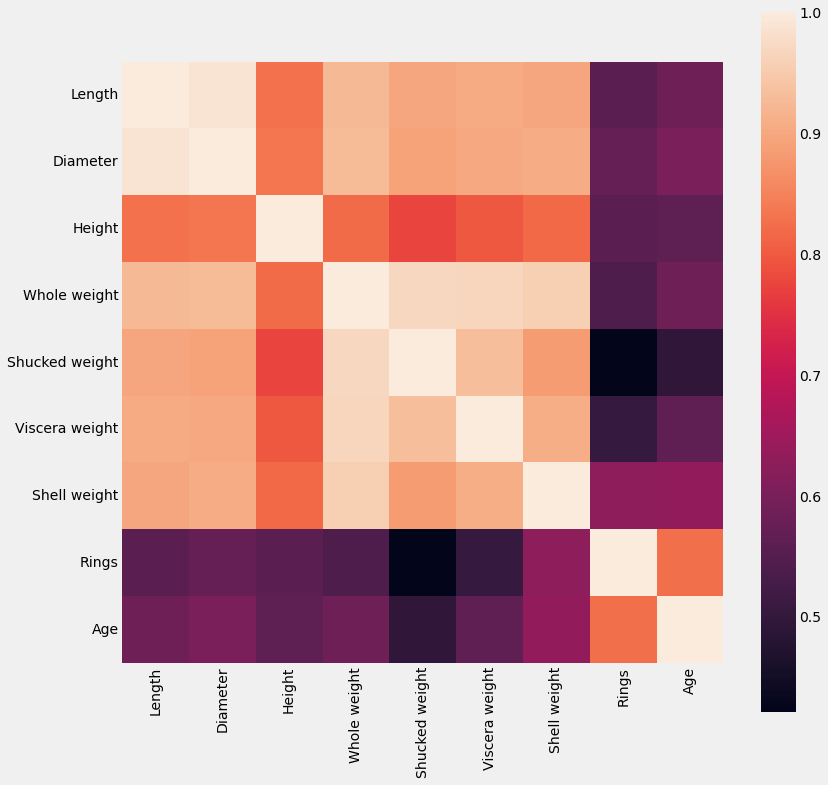

In [44]:
corr = df.select_dtypes(include=['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)


<Figure size 432x288 with 0 Axes>

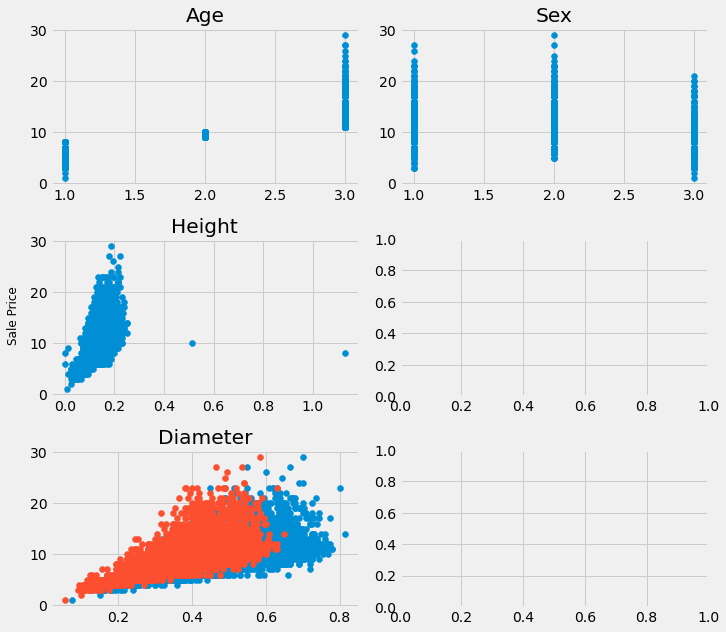

In [45]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
ring = df.Rings.values
axarr[0, 0].scatter(df.Age.values, ring)
axarr[0, 0].set_title('Age')
axarr[0, 1].scatter(df.Sex.values, ring)
axarr[0, 1].set_title('Sex')
axarr[1, 0].scatter(df.Height.values, ring)
axarr[1, 0].set_title('Height')
axarr[2, 0].scatter(df.Length.values, ring)
axarr[2, 0].set_title('Length')
axarr[2, 0].scatter(df.Diameter.values, ring)
axarr[2, 0].set_title('Diameter')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.show()


### Height of abalones is in the range of 0 to 0.2mm, most abalones are old aged.

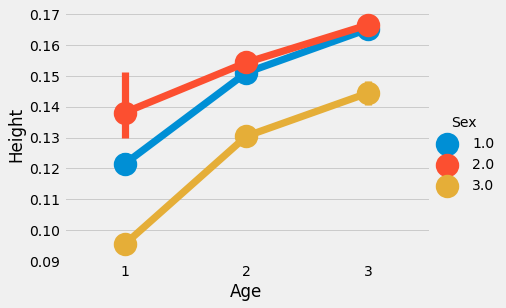

In [46]:
sns.catplot(x='Age', y='Height', hue='Sex', estimator=np.mean, data=df,
            height=4.5, aspect=1.4, kind='point')


### Female abalones have largest height. Male abalones have height ranging from 0.12 to 0.15mm. 

### Dividing the dataset into 75% training and 25% test data using train_test_split

In [47]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(
    X, Y)  # splits 75%/25% by default


### Shape of training and testing data

In [48]:
print("train_df_x:")
print(train_X.shape)

print("train_df_y:")
print(train_y.shape)

print("test_df_x:")
print(test_X.shape)

print("test_df_y:")
print(test_y.shape)


train_df_x:
(3132, 8)
train_df_y:
(3132, 1)
test_df_x:
(1045, 8)
test_df_y:
(1045, 1)


In [49]:
def getAccuracy(testSet, predictions):

    correct = 0

    for x in range(len(testSet)):

        if testSet[x][-1] == predictions[x]:

            correct += 1

    return (correct/float(len(testSet))) * 100.0


### Function to calculate ROC curve.

### 1. Logistic Regression

In [50]:
import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
#from statsmodels.formula.api import logit, probit, poisson, ols

#logit = sm.Logit(train_y, train_X)
#affair_mod = logit.fit()
# print(affair_mod.summary())
#model = LogisticRegression()

# logistic regression
log_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg.fit(train_X, train_y.values.ravel())
print("Intercept is ", log_reg.intercept_)
print("Coefficient is ", log_reg.coef_)
y_pred = log_reg.predict(test_X)
# calculate ROC curve
#preds = log_reg.predict_proba(test_X)
#calculate_roc_curve(test_y, preds,3)

# calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)

print("Accuracy of Logistic Regression is:")
print(accuracy_score(test_y, y_pred)*100)


# Mean Absolute Error
mae = mean_absolute_error(test_y, y_pred)
print("MAE:"+str(mae))

# RMSE
rmse = sqrt(mean_squared_error(test_y, y_pred))
print("RMSE:"+str(rmse))

# Median Absolute error
Medae = median_absolute_error(test_y, y_pred)
print("Median Absolute Error:"+str(Medae))


print("Classification report for Test data %s:\n%s\n\n"
      % (log_reg, metrics.classification_report(test_y, y_pred)))


Intercept is  [ 2.39365604 -1.16992943 -1.22372662]
Coefficient is  [[ 0.31093175 -1.47880141 -2.28117001 -1.3365609  -2.22972013  4.80348453
  -0.88577373 -4.81102864]
 [-0.10346193  2.0662269   1.36258737  0.031956   -0.93773836  1.57381869
   1.37446258 -0.36525723]
 [-0.20746982 -0.58742549  0.91858264  1.3046049   3.16745849 -6.37730322
  -0.48868885  5.17628587]]
Confusion Matrix
Accuracy of Logistic Regression is:
65.64593301435406
MAE:0.39138755980861245
RMSE:0.6979121289338068
Median Absolute Error:0.0
Classification report for Test data LogisticRegression(multi_class='multinomial', solver='newton-cg'):
              precision    recall  f1-score   support

           1       0.74      0.79      0.77       368
           2       0.53      0.45      0.48       325
           3       0.66      0.71      0.68       352

    accuracy                           0.66      1045
   macro avg       0.64      0.65      0.64      1045
weighted avg       0.65      0.66      0.65      1045


In [51]:
def confusion_matrix_data(conf_matrix):
    fix, ax = plt.subplots(figsize=(16, 12))
    plt.suptitle('Confusion Matrix  on Data Set')
    for ii, values in conf_matrix.items():
        matrix = values['matrix']
        title = values['title']
        plt.subplot(2, 2, ii)  
        # starts from 1
        plt.title(title)
        sns.heatmap(matrix, annot=True,  fmt='')


### 2. Neural Networks

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{"activation": ["identity", "logistic", 'tanh', 'relu'], 'solver': [
     'sgd', 'adam'], 'hidden_layer_sizes': [(20, 10, 20)]}]
clf = GridSearchCV(MLPClassifier(max_iter=1500), param_grid, cv=3, scoring='accuracy')
clf.fit(train_X, train_y.values.ravel())

print("Best parameters set found on development set:")
print(clf.best_params_)

# # neural network
# scaler = StandardScaler()
# # Fit only to the training data
# scaler.fit(train_X)
# train_X = scaler.transform(train_X)
# test_X = scaler.transform(test_X)

# clf = MLPClassifier()
# clf.fit(train_X, train_y.values.ravel())
predictions = clf.predict(test_X)
y_pred = predictions

# calculate ROC curve
#preds = clf.predict_proba(test_X)[:,1]
#calculate_roc_curve(test_y, y_pred,3)


# calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)

print("Accuracy of Neural Networks is")
print(accuracy_score(test_y, y_pred)*100)

# Mean Absolute Error

mae = mean_absolute_error(test_y, y_pred)
print("MAE:"+str(mae))
# RMSE
rmse = sqrt(mean_squared_error(test_y, y_pred))
print("RMSE:"+str(rmse))
# Median Absolute error
Medae = median_absolute_error(test_y, y_pred)
print("Median Absolute Error:"+str(Medae))


print("Classification report for Test data %s:\n%s\n\n"
      % (clf, metrics.classification_report(test_y, y_pred)))


Best parameters set found on development set:
{'activation': 'tanh', 'hidden_layer_sizes': (20, 10, 20), 'solver': 'adam'}
Confusion Matrix
Accuracy of Neural Networks is
66.88995215311004
MAE:0.36363636363636365
RMSE:0.6547580728569079
Median Absolute Error:0.0
Classification report for Test data GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1500),
             param_grid=[{'activation': ['identity', 'logistic', 'tanh',
                                         'relu'],
                          'hidden_layer_sizes': [(20, 10, 20)],
                          'solver': ['sgd', 'adam']}],
             scoring='accuracy'):
              precision    recall  f1-score   support

           1       0.79      0.78      0.78       368
           2       0.52      0.50      0.51       325
           3       0.68      0.71      0.69       352

    accuracy                           0.67      1045
   macro avg       0.66      0.66      0.66      1045
weighted avg       0.67      0.67      0

### 3. Random Forest

In [56]:
# Random Forest
rf = RandomForestClassifier(n_jobs=2)
rf.fit(train_X, train_y.values.ravel())
preds = rf.predict_proba(test_X)[:, 1]
y_pred = rf.predict(test_X)
# calculate ROC curve
#calculate_roc_curve(y_test, y_pred,2)


# calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)

print("Accuracy of Random Forest is:")
print(accuracy_score(test_y, y_pred)*100)

# Mean Absolute Error

mae = mean_absolute_error(test_y, y_pred)
print("MAE:"+str(mae))
# RMSE
rmse = sqrt(mean_squared_error(test_y, y_pred))
print("RMSE:"+str(rmse))
# Median Absolute error
Medae = median_absolute_error(test_y, y_pred)
print("Median Absolute Error:"+str(Medae))


print("Classification report for Test data %s:\n%s\n\n"
      % (rf, metrics.classification_report(test_y, y_pred)))


Confusion Matrix
Accuracy of Random Forest is:
65.55023923444976
MAE:0.3827751196172249
RMSE:0.6777389936698861
Median Absolute Error:0.0
Classification report for Test data RandomForestClassifier(n_jobs=2):
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       368
           2       0.51      0.46      0.48       325
           3       0.65      0.71      0.68       352

    accuracy                           0.66      1045
   macro avg       0.65      0.65      0.65      1045
weighted avg       0.65      0.66      0.65      1045





### 4.  KNN Classifier

In [58]:
# Create an instance of KNeighborsClassifier and then fit training data
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(train_X, train_y.values.ravel())
# Make class predictions for all observations in X
y_pred = clf.predict(test_X)
# Compare predicted class labels with actual class labels
# accuracy=clf.score(X,Y)
#print ("Predicted model accuracy: "+ str(accuracy))

# calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)

print("Accuracy of KNN Classifier is:")
print(accuracy_score(test_y, y_pred)*100)

# Mean Absolute Error

mae = mean_absolute_error(test_y, y_pred)
print("MAE:"+str(mae))
# RMSE
rmse = sqrt(mean_squared_error(test_y, y_pred))
print("RMSE:"+str(rmse))
# Median Absolute error
Medae = median_absolute_error(test_y, y_pred)
print("Median Absolute Error:"+str(Medae))


print("Classification report for Test data %s:\n%s\n\n"
      % (clf, metrics.classification_report(test_y, y_pred)))


Confusion Matrix
Accuracy of KNN Classifier is:
63.54066985645933
MAE:0.3980861244019139
RMSE:0.6819617073816742
Median Absolute Error:0.0
Classification report for Test data KNeighborsClassifier():
              precision    recall  f1-score   support

           1       0.73      0.80      0.76       368
           2       0.47      0.50      0.49       325
           3       0.70      0.59      0.64       352

    accuracy                           0.64      1045
   macro avg       0.63      0.63      0.63      1045
weighted avg       0.64      0.64      0.64      1045



